In [2]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system')

In [51]:
Bok_Data=pd.read_csv('../try/BOK_Data.csv',encoding='utf-8')
Bok_Data.head()

,연도,기준금리
0,2000,5.25
1,2001,4.00
2,2002,4.25
3,2003,3.75
4,2004,3.25


In [78]:
Bok_Data2=Bok_Data[9:18]
Bok_Data2

,연도,기준금리
9,2009,2.00
10,2010,2.50
11,2011,3.25
12,2012,2.75
13,2013,2.50
14,2014,2.00
15,2015,1.50
16,2016,1.25
17,2017,1.50


In [85]:
Bok_Data3=Bok_Data.head(9)
Bok_Data3

,연도,기준금리
0,2000,5.25
1,2001,4.00
2,2002,4.25
3,2003,3.75
4,2004,3.25
5,2005,3.75
6,2006,4.50
7,2007,5.00
8,2008,3.00


In [63]:
mortgage4=pd.read_csv('../try/mortgage_index4.csv', encoding='utf-8')
mortgage4.head()

,연도,전국,서울,대구,경기
0,2000,65.126,56.038,54.283,60.354
1,2001,65.996,57.105,55.476,61.508
2,2002,71.919,66.127,62.556,69.548
3,2003,74.386,69.582,65.592,73.108
4,2004,77.252,72.422,68.974,77.585


In [84]:
mortgage5=mortgage4[9:18]
mortgage5

,연도,전국,서울,대구,경기
9,2009,89.543,89.549,83.828,90.619
10,2010,90.481,90.022,85.618,91.963
11,2011,91.536,90.892,87.297,93.315
12,2012,92.411,91.236,89.307,94.284
13,2013,93.458,92.337,91.256,95.144
14,2014,95.295,94.795,93.866,96.321
15,2015,97.584,97.344,96.668,97.990
16,2016,100.218,100.239,100.377,100.176
17,2017,104.105,104.564,107.407,103.632


In [86]:
mortgage6=mortgage4.head(9)
mortgage6

,연도,전국,서울,대구,경기
0,2000,65.126,56.038,54.283,60.354
1,2001,65.996,57.105,55.476,61.508
2,2002,71.919,66.127,62.556,69.548
3,2003,74.386,69.582,65.592,73.108
4,2004,77.252,72.422,68.974,77.585
5,2005,81.098,77.176,73.139,81.968
6,2006,85.651,84.253,77.468,86.130
7,2007,88.980,89.209,81.111,89.770
8,2008,88.696,88.317,82.995,89.529


금리와 지가지수의 상관성비교(2000-2017)

In [216]:
data_result=pd.merge(Bok_Data,mortgage4,on='연도')
data_result

,연도,기준금리,전국,서울,대구,경기
0,2000,5.25,65.126,56.038,54.283,60.354
1,2001,4.00,65.996,57.105,55.476,61.508
2,2002,4.25,71.919,66.127,62.556,69.548
3,2003,3.75,74.386,69.582,65.592,73.108
4,2004,3.25,77.252,72.422,68.974,77.585
5,2005,3.75,81.098,77.176,73.139,81.968
6,2006,4.50,85.651,84.253,77.468,86.130
7,2007,5.00,88.980,89.209,81.111,89.770
8,2008,3.00,88.696,88.317,82.995,89.529
9,2009,2.00,89.543,89.549,83.828,90.619


In [217]:
np.corrcoef(data_result['기준금리'],data_result['전국'])

array([[ 1.        , -0.77993909],
       [-0.77993909,  1.        ]])

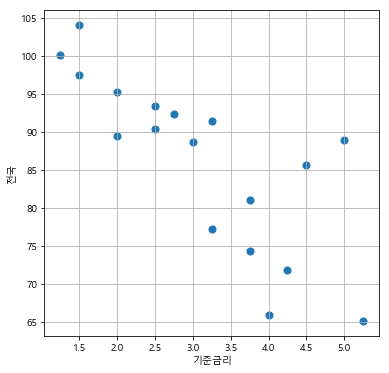

In [218]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['기준금리'],data_result['전국'],s=50)
plt.xlabel('기준금리')
plt.ylabel('전국')
plt.grid()
plt.show()

In [219]:
fp1=np.polyfit(data_result['기준금리'],data_result['전국'],1)
fp1

array([ -7.30339401, 109.04028135])

In [220]:
f1=np.poly1d(fp1)
fx=np.linspace(1,5.5,9)

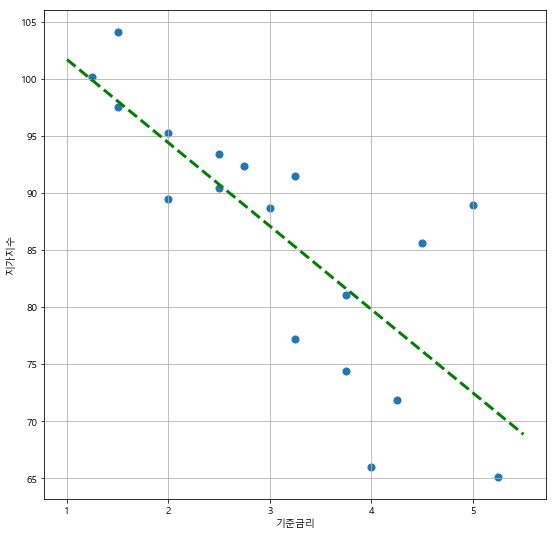

In [222]:
plt.figure(figsize=(9,9))
plt.scatter(data_result['기준금리'],data_result['전국'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('기준금리')
plt.ylabel('지가지수')
plt.grid()
plt.show()

금리와 지가지수의 상관성비교(2009-2017)

In [223]:
data_result10=pd.merge(Bok_Data2,mortgage5,on='연도')
data_result10

,연도,기준금리,전국,서울,대구,경기
0,2009,2.00,89.543,89.549,83.828,90.619
1,2010,2.50,90.481,90.022,85.618,91.963
2,2011,3.25,91.536,90.892,87.297,93.315
3,2012,2.75,92.411,91.236,89.307,94.284
4,2013,2.50,93.458,92.337,91.256,95.144
5,2014,2.00,95.295,94.795,93.866,96.321
6,2015,1.50,97.584,97.344,96.668,97.990
7,2016,1.25,100.218,100.239,100.377,100.176
8,2017,1.50,104.105,104.564,107.407,103.632


In [224]:
np.corrcoef(data_result10['기준금리'],data_result10['전국'])

array([[ 1.        , -0.73927202],
       [-0.73927202,  1.        ]])

In [225]:
fp10=np.polyfit(data_result10['기준금리'],data_result10['전국'],1)
fp10

array([ -5.40967589, 106.52969565])

In [226]:
f1=np.poly1d(fp10)
fx=np.linspace(1,3.5,9)

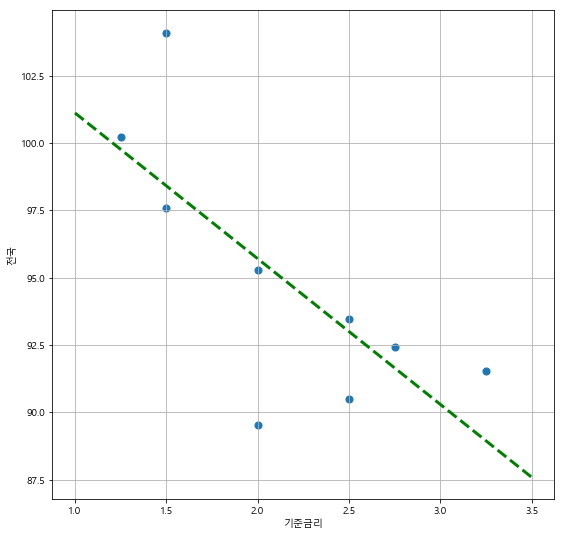

In [227]:
plt.figure(figsize=(9,9))
plt.scatter(data_result10['기준금리'],data_result10['전국'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('기준금리')
plt.ylabel('전국')
plt.grid()
plt.show()

금리와 지가지수의 상관성비교(2000-2008)

In [228]:
data_result11=pd.merge(Bok_Data3,mortgage6,on='연도')
data_result11

,연도,기준금리,전국,서울,대구,경기
0,2000,5.25,65.126,56.038,54.283,60.354
1,2001,4.00,65.996,57.105,55.476,61.508
2,2002,4.25,71.919,66.127,62.556,69.548
3,2003,3.75,74.386,69.582,65.592,73.108
4,2004,3.25,77.252,72.422,68.974,77.585
5,2005,3.75,81.098,77.176,73.139,81.968
6,2006,4.50,85.651,84.253,77.468,86.130
7,2007,5.00,88.980,89.209,81.111,89.770
8,2008,3.00,88.696,88.317,82.995,89.529


In [229]:
np.corrcoef(data_result11['기준금리'],data_result11['전국'])

array([[ 1.        , -0.23023346],
       [-0.23023346,  1.        ]])

In [232]:
fp11=np.polyfit(data_result11['기준금리'],data_result11['전국'],1)
fp11

array([-2.79375926, 89.08607253])

In [233]:
f1=np.poly1d(fp11)
fx=np.linspace(3,5.5,9)

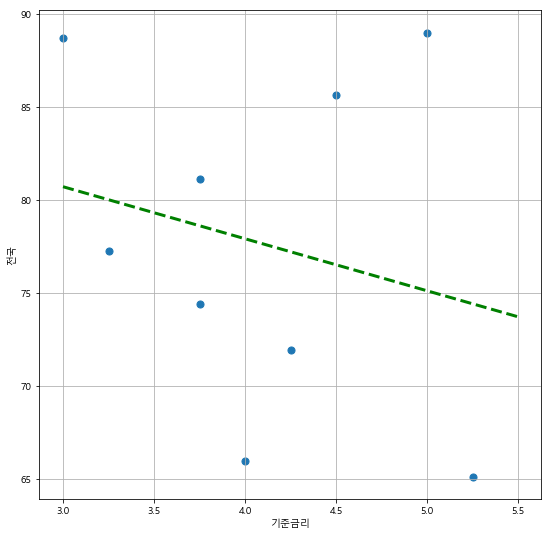

In [234]:
plt.figure(figsize=(9,9))
plt.scatter(data_result11['기준금리'],data_result11['전국'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('기준금리')
plt.ylabel('전국')
plt.grid()
plt.show()

연간 건축량과 지가지수의 상관성비교

In [97]:
homecount=pd.read_csv('../try/homecount.csv',encoding='utf-8')
homecount.head()

,연도,건축수
0,2000,81058
1,2001,97717
2,2002,138734
3,2003,142108
4,2004,117461


In [181]:
data_result2=pd.merge(mortgage4,homecount,on='연도')
data_result2.head()

,연도,전국,서울,대구,경기,건축수
0,2000,65.126,56.038,54.283,60.354,81058
1,2001,65.996,57.105,55.476,61.508,97717
2,2002,71.919,66.127,62.556,69.548,138734
3,2003,74.386,69.582,65.592,73.108,142108
4,2004,77.252,72.422,68.974,77.585,117461


In [182]:
del data_result2['서울']
del data_result2['대구']
del data_result2['경기']
data_result2

,연도,전국,건축수
0,2000,65.126,81058
1,2001,65.996,97717
2,2002,71.919,138734
3,2003,74.386,142108
4,2004,77.252,117461
5,2005,81.098,111506
6,2006,85.651,133271
7,2007,88.980,151054
8,2008,88.696,120720
9,2009,89.543,105137


In [183]:
np.corrcoef(data_result2['건축수'],data_result2['전국'])

array([[1.        , 0.67255492],
       [0.67255492, 1.        ]])

In [184]:
fp2=np.polyfit(data_result2['건축수'],data_result2['전국'],1)
fp2

array([2.70156800e-04, 4.97320023e+01])

In [185]:
f1=np.poly1d(fp2)
fx=np.linspace(75000,200000,15)

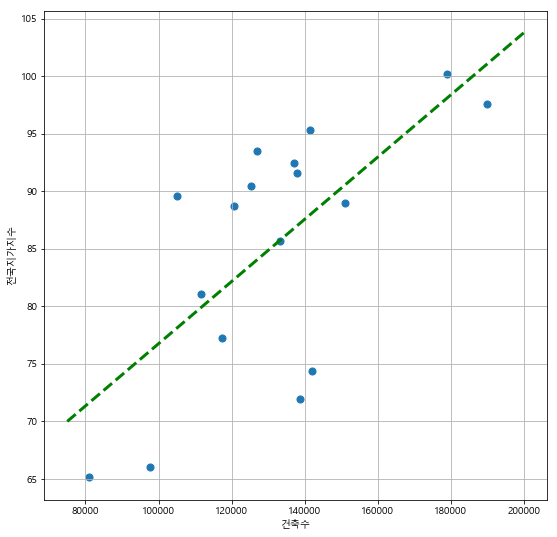

In [188]:
plt.figure(figsize=(9,9))
plt.scatter(data_result2['건축수'],data_result2['전국'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('건축수')
plt.ylabel('전국지가지수')
plt.grid()
plt.show()

화폐 공급량과 지가지수의 상관성비교(Lf에 초점)

In [101]:
money_supply=pd.read_csv('../try/money supply2.csv',encoding='utf-8')
money_supply.head()

,연도,Lf,M2
0,2009,1937.3,1508.6
1,2010,2096.5,1639.7
2,2011,2208.2,1709.0
3,2012,2379.5,1798.6
4,2013,2543.2,1885.8


In [235]:
data_result3=pd.merge(mortgage4,money_supply,on='연도')
data_result3.head()

,연도,전국,서울,대구,경기,Lf,M2
0,2009,89.543,89.549,83.828,90.619,1937.3,1508.6
1,2010,90.481,90.022,85.618,91.963,2096.5,1639.7
2,2011,91.536,90.892,87.297,93.315,2208.2,1709.0
3,2012,92.411,91.236,89.307,94.284,2379.5,1798.6
4,2013,93.458,92.337,91.256,95.144,2543.2,1885.8


In [236]:
np.corrcoef(data_result3['Lf'],data_result3['전국'])

array([[1.        , 0.98615986],
       [0.98615986, 1.        ]])

In [237]:
fp3=np.polyfit(data_result3['Lf'],data_result3['전국'],1)
fp3

array([9.17891886e-03, 7.09423588e+01])

In [238]:
f1=np.poly1d(fp3)
fx=np.linspace(1750,3500,15)

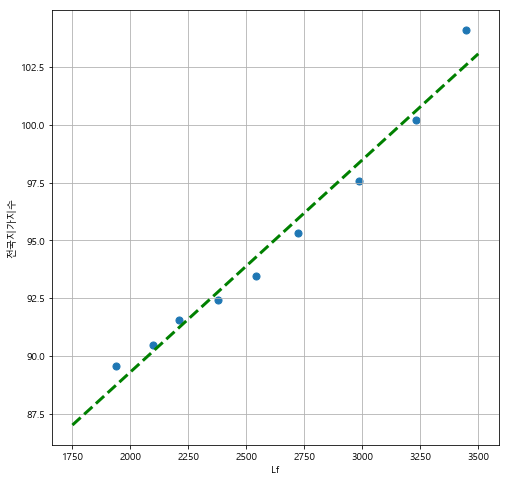

In [239]:
plt.figure(figsize=(8,8))
plt.scatter(data_result3['Lf'],data_result3['전국'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('Lf')
plt.ylabel('전국지가지수')
plt.grid()
plt.show()

In [111]:
laborprofit=pd.read_csv('../try/laborprofit.csv',encoding='utf-8')
laborprofit

,연도,전국,서울,대구,경기도
0,2000,8602,10119,8253,8865
1,2001,8964,10616,8481,9126
2,2002,9419,11185,8886,9672
3,2003,9848,11787,9261,9952
4,2004,10493,12493,9711,10554
5,2005,11198,13453,10482,11181
6,2006,11656,13955,10925,11583
7,2007,12407,15130,11562,12084
8,2008,12883,15401,12017,12592
9,2009,13173,15405,12315,12697


1인당 소득과 지가지수의 상관성비교(2000-2017)

In [199]:
data_result4=pd.merge(mortgage4,laborprofit,on='연도')
data_result4

,연도,전국_x,서울_x,대구_x,경기,전국_y,서울_y,대구_y,경기도
0,2000,65.126,56.038,54.283,60.354,8602,10119,8253,8865
1,2001,65.996,57.105,55.476,61.508,8964,10616,8481,9126
2,2002,71.919,66.127,62.556,69.548,9419,11185,8886,9672
3,2003,74.386,69.582,65.592,73.108,9848,11787,9261,9952
4,2004,77.252,72.422,68.974,77.585,10493,12493,9711,10554
5,2005,81.098,77.176,73.139,81.968,11198,13453,10482,11181
6,2006,85.651,84.253,77.468,86.130,11656,13955,10925,11583
7,2007,88.980,89.209,81.111,89.770,12407,15130,11562,12084
8,2008,88.696,88.317,82.995,89.529,12883,15401,12017,12592
9,2009,89.543,89.549,83.828,90.619,13173,15405,12315,12697


In [195]:
np.corrcoef(data_result4['전국_y'],data_result4['전국_x'])

array([[1.        , 0.95660023],
       [0.95660023, 1.        ]])

In [196]:
fp4=np.polyfit(data_result4['전국_y'],data_result4['전국_x'],1)
fp4

array([3.51156282e-03, 3.98820985e+01])

In [197]:
f1=np.poly1d(fp4)
fx=np.linspace(8000,18000,15)

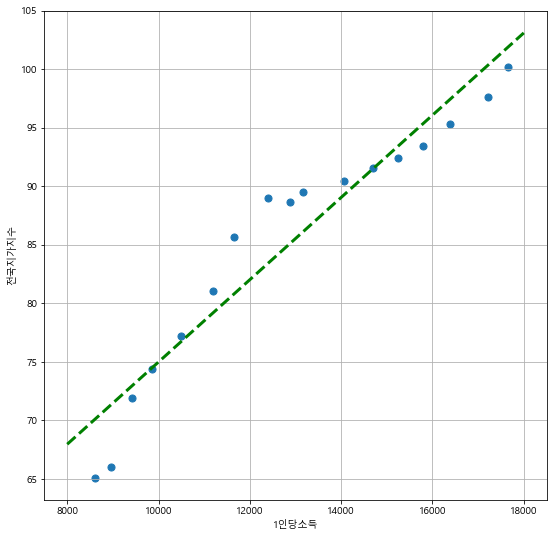

In [198]:
plt.figure(figsize=(9,9))
plt.scatter(data_result4['전국_y'],data_result4['전국_x'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('1인당소득')
plt.ylabel('전국지가지수')
plt.grid()
plt.show()

In [114]:
homecount=pd.read_csv('../try/homecount.csv',encoding='utf-8')
homecount

,연도,건축수
0,2000,81058
1,2001,97717
2,2002,138734
3,2003,142108
4,2004,117461
5,2005,111506
6,2006,133271
7,2007,151054
8,2008,120720
9,2009,105137


In [115]:
tradecount=pd.read_csv('../try/tradecount.csv',encoding='utf-8')
tradecount.head()

,연도,전국,서울,경기
0,2006,1494935,323392,450757
1,2007,1148574,193334,299856
2,2008,1179742,183197,275248
3,2009,1133637,170962,285130
4,2010,1037229,115227,234142


건축수와 거래량간의 상관성비교(2006-2017)

In [116]:
data_result5=pd.merge(homecount,tradecount,on='연도')
data_result5

,연도,건축수,전국,서울,경기
0,2006,133271,1494935,323392,450757
1,2007,151054,1148574,193334,299856
2,2008,120720,1179742,183197,275248
3,2009,105137,1133637,170962,285130
4,2010,125447,1037229,115227,234142
5,2011,137868,1231393,141596,263141
6,2012,137141,1004006,112094,210779
7,2013,127065,1187279,150768,262864
8,2014,141346,1447123,201991,319526
9,2015,189840,1720795,280313,418790


In [117]:
np.corrcoef(data_result5['건축수'],data_result5['전국'])

array([[1.        , 0.75820706],
       [0.75820706, 1.        ]])

In [7]:
fp5=np.polyfit(data_result5['건축수'],data_result5['전국'],1)
fp5

array([7.36730071e+00, 2.55029106e+05])

In [14]:
f1=np.poly1d(fp5)
fx=np.linspace(100000,200000,15)

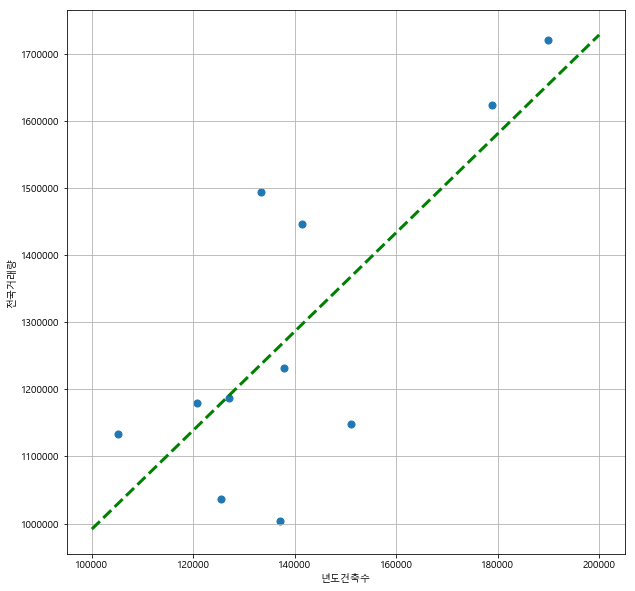

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(data_result5['건축수'],data_result5['전국'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('년도건축수')
plt.ylabel('전국거래량')
plt.grid()
plt.show()

In [118]:
mortgage_indexchange=pd.read_csv('../try/mortgage_indexchange.csv', encoding='utf-8')
mortgage_indexchange.head()

,연도,전국,서울,대구,경기
0,2006,5.617,9.171,4.185,5.074
1,2007,3.886,5.882,2.911,4.229
2,2008,-0.319,-1.001,-0.451,-0.267
3,2009,0.955,1.396,0.284,1.217
4,2010,1.046,0.527,1.401,1.485


부동산 지가지수 변동량과 연간 건축량과의 상관석 분석

In [119]:
data_result6=pd.merge(homecount,mortgage_indexchange,on='연도')
data_result6

,연도,건축수,전국,서울,대구,경기
0,2006,133271,5.617,9.171,4.185,5.074
1,2007,151054,3.886,5.882,2.911,4.229
2,2008,120720,-0.319,-1.001,-0.451,-0.267
3,2009,105137,0.955,1.396,0.284,1.217
4,2010,125447,1.046,0.527,1.401,1.485
5,2011,137868,1.166,0.966,1.398,1.470
6,2012,137141,0.956,0.378,1.583,1.038
7,2013,127065,1.135,1.206,1.679,0.912
8,2014,141346,1.964,2.662,3.149,1.236
9,2015,189840,2.402,2.688,4.059,1.733


In [120]:
np.corrcoef(data_result6['건축수'],data_result6['전국'])

array([[1.        , 0.37949205],
       [0.37949205, 1.        ]])

In [121]:
fp6=np.polyfit(data_result6['건축수'],data_result6['전국'],1)
fp6

array([ 2.52424669e-05, -1.59667052e+00])

In [122]:
f1=np.poly1d(fp6)
fx=np.linspace(100000,200000,15)

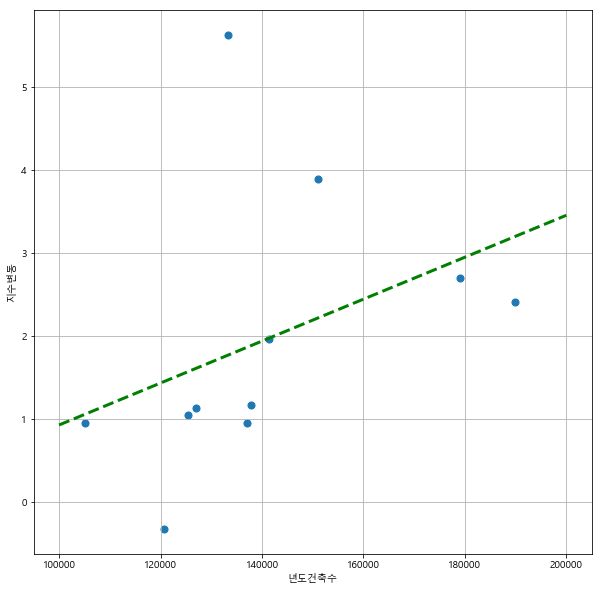

In [123]:
plt.figure(figsize=(10,10))
plt.scatter(data_result6['건축수'],data_result6['전국'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('년도건축수')
plt.ylabel('지수변동')
plt.grid()
plt.show()

In [124]:
monthly_fee=pd.read_csv('../try/monthly_fee.csv',encoding='utf-8')
monthly_fee.head()

,연도,수도권,서울
0,2010,98.1,99.7
1,2011,100.6,100.7
2,2013,98.4,97.6
3,2014,96.1,95.3
4,2015,95.9,95.3


월세와 1인당소득의 상관성 분석

In [200]:
data_result7=pd.merge(monthly_fee,laborprofit,on='연도')
data_result7.head()

,연도,수도권,서울_x,전국,서울_y,대구,경기도
0,2010,98.1,99.7,14068,16495,13376,13592
1,2011,100.6,100.7,14706,17215,14183,14303
2,2013,98.4,97.6,15799,18565,15047,15384
3,2014,96.1,95.3,16394,19104,15851,16131
4,2015,95.9,95.3,17222,19962,16686,17130


In [201]:
np.corrcoef(data_result7['전국'],data_result7['수도권'])

array([[ 1.        , -0.74586409],
       [-0.74586409,  1.        ]])

In [202]:
fp7=np.polyfit(data_result7['전국'],data_result7['수도권'],1)
fp7

array([-1.13023888e-03,  1.15494450e+02])

In [203]:
f1=np.poly1d(fp7)
fx=np.linspace(14000,17500,15)

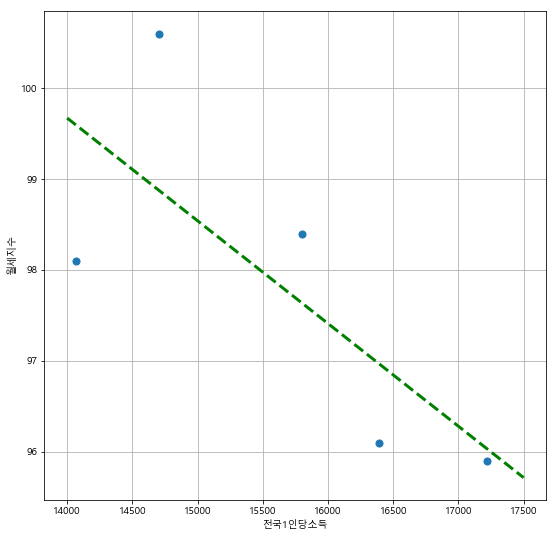

In [205]:
plt.figure(figsize=(9,9))
plt.scatter(data_result7['전국'],data_result7['수도권'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')


plt.xlabel('전국1인당소득')
plt.ylabel('월세지수')


plt.grid()
plt.show()

In [50]:
apartment_index=pd.read_csv('../try/apartment_index.csv',encoding='utf-8')
apartment_index.head()

,연도,전국,수도권,지방,6대광역시,5대광역시,8개도,서울
0,2006,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,2007,119.9,128.1,105.4,109.6,104.1,106.6,124.9
2,2008,124.7,137.1,107.2,116.4,104.2,109.9,131.6
3,2009,119.0,128.0,107.9,116.0,102.4,112.7,121.2
4,2010,131.0,144.2,116.6,124.5,112.5,120.3,143.0


기준금리와 아파트 매매지수의 상관성 분석

In [61]:
data_result8=pd.merge(Bok_Data,apartment_index,on='연도')
data_result8

,연도,기준금리,전국,수도권,지방,6대광역시,5대광역시,8개도,서울
0,2006,4.50,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,2007,5.00,119.9,128.1,105.4,109.6,104.1,106.6,124.9
2,2008,3.00,124.7,137.1,107.2,116.4,104.2,109.9,131.6
3,2009,2.00,119.0,128.0,107.9,116.0,102.4,112.7,121.2
4,2010,2.50,131.0,144.2,116.6,124.5,112.5,120.3,143.0
5,2011,3.25,134.0,138.8,129.5,131.4,125.6,133.0,138.5
6,2012,2.75,141.8,135.0,147.9,144.1,144.1,151.2,132.9
7,2013,2.50,138.4,126.1,148.9,143.1,145.0,152.3,123.5
8,2014,2.00,143.9,130.4,155.4,150.3,153.1,157.5,128.0
9,2015,1.50,151.2,136.2,164.1,160.3,163.8,164.4,133.2


In [129]:
np.corrcoef(data_result8['기준금리'],data_result8['전국'])

array([[ 1.        , -0.79106252],
       [-0.79106252,  1.        ]])

In [55]:
fp8=np.polyfit(data_result8['기준금리'],data_result8['전국'],1)
fp8

array([-12.508406  , 168.81182421])

In [59]:
f1=np.poly1d(fp8)
fx=np.linspace(1,5,15)

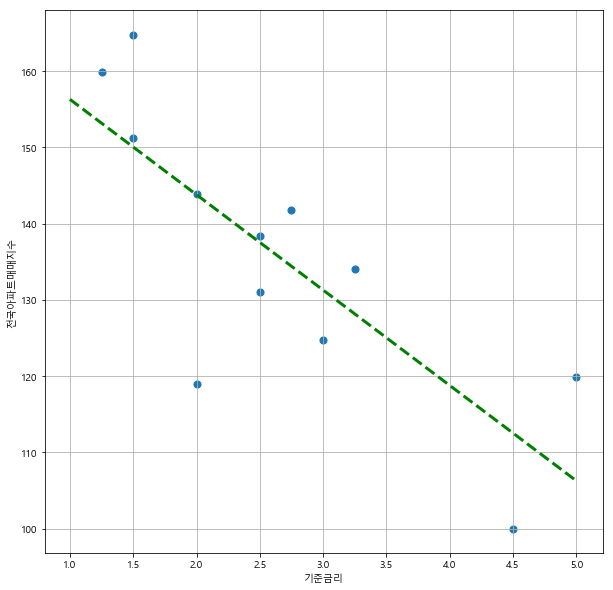

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(data_result8['기준금리'],data_result8['전국'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('기준금리')
plt.ylabel('전국아파트매매지수')
plt.grid()
plt.show()

In [137]:
tradecount=pd.read_csv('../try/tradecount.csv',encoding='utf-8')
tradecount

,연도,전국,서울,경기
0,2006,1494935,323392,450757
1,2007,1148574,193334,299856
2,2008,1179742,183197,275248
3,2009,1133637,170962,285130
4,2010,1037229,115227,234142
5,2011,1231393,141596,263141
6,2012,1004006,112094,210779
7,2013,1187279,150768,262864
8,2014,1447123,201991,319526
9,2015,1720795,280313,418790


In [138]:
data_result12=pd.merge(homecount,tradecount,on='연도')
data_result12

,연도,건축수,전국,서울,경기
0,2006,133271,1494935,323392,450757
1,2007,151054,1148574,193334,299856
2,2008,120720,1179742,183197,275248
3,2009,105137,1133637,170962,285130
4,2010,125447,1037229,115227,234142
5,2011,137868,1231393,141596,263141
6,2012,137141,1004006,112094,210779
7,2013,127065,1187279,150768,262864
8,2014,141346,1447123,201991,319526
9,2015,189840,1720795,280313,418790


In [140]:
np.corrcoef(data_result12['건축수'],data_result12['전국'])

array([[1.        , 0.75820706],
       [0.75820706, 1.        ]])

In [141]:
fp12=np.polyfit(data_result12['건축수'],data_result12['전국'],1)
fp12

array([7.36730071e+00, 2.55029106e+05])

In [190]:
f1=np.poly1d(fp12)
fx=np.linspace(100000,190000,15)

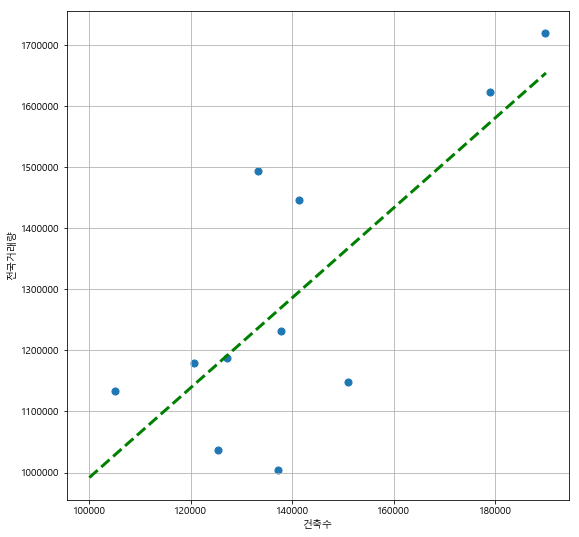

In [191]:
plt.figure(figsize=(9,9))
plt.scatter(data_result12['건축수'],data_result12['전국'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('건축수')
plt.ylabel('전국거래량')
plt.grid()
plt.show()

주택가격 동향과 기준금리와의 상관성 분석

In [148]:
homeprice=pd.read_csv('../try/homeprice.csv',encoding='utf-8')
homeprice

,연도,전국,수도권,서울,강남,강북
0,2000,0.4,2.3,3.1,4.4,1.4
1,2001,9.9,13.9,12.9,17.5,7.7
2,2002,16.4,21.8,22.5,27.4,16.3
3,2003,5.7,7.4,6.9,10.5,2.9
4,2004,-2.1,-2.9,-1.4,-1.6,-1.2
5,2005,4.0,5.1,6.3,9.4,3.3
6,2006,11.6,20.3,18.9,22.7,14.8
7,2007,3.1,5.6,5.4,2.6,8.7
8,2008,3.1,5.0,5.0,1.3,8.8
9,2009,1.5,1.2,2.7,3.4,1.9


In [152]:
data_result13=pd.merge(Bok_Data,homeprice,on='연도')
data_result13

,연도,기준금리,전국,수도권,서울,강남,강북
0,2000,5.25,0.4,2.3,3.1,4.4,1.4
1,2001,4.00,9.9,13.9,12.9,17.5,7.7
2,2002,4.25,16.4,21.8,22.5,27.4,16.3
3,2003,3.75,5.7,7.4,6.9,10.5,2.9
4,2004,3.25,-2.1,-2.9,-1.4,-1.6,-1.2
5,2005,3.75,4.0,5.1,6.3,9.4,3.3
6,2006,4.50,11.6,20.3,18.9,22.7,14.8
7,2007,5.00,3.1,5.6,5.4,2.6,8.7
8,2008,3.00,3.1,5.0,5.0,1.3,8.8
9,2009,2.00,1.5,1.2,2.7,3.4,1.9


In [153]:
np.corrcoef(data_result13['기준금리'],data_result13['전국'])

array([[1.        , 0.44094537],
       [0.44094537, 1.        ]])

In [154]:
fp13=np.polyfit(data_result13['기준금리'],data_result13['전국'],1)
fp13

array([ 1.70055494, -1.39617092])

In [155]:
f1=np.poly1d(fp13)
fx=np.linspace(1.5,5.5,15)

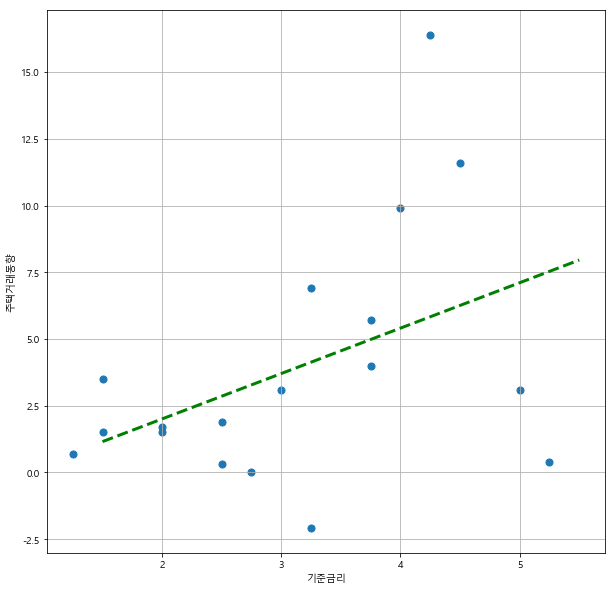

In [157]:
plt.figure(figsize=(10,10))
plt.scatter(data_result13['기준금리'],data_result13['전국'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('기준금리')
plt.ylabel('주택거래동향')
plt.grid()
plt.show()

기준금리와 전세가 동향비교

In [150]:
home_lend=pd.read_csv('../try/home_lend.csv',encoding='utf-8')
home_lend

,연도,전국,수도권,서울,강남,강북
0,2000,11.1,13.9,13.8,12.5,15.0
1,2001,16.4,20.0,18.7,21.0,16.1
2,2002,10.1,9.5,10.8,11.8,9.8
3,2003,-1.4,-3.3,-3.9,-3.0,-4.8
4,2004,-5.0,-7.2,-7.2,-7.5,-7.0
5,2005,3.0,3.8,2.3,4.7,-0.1
6,2006,6.5,10.4,9.8,10.1,9.6
7,2007,2.6,3.7,3.7,2.2,5.4
8,2008,1.7,1.7,1.1,-1.2,3.5
9,2009,3.4,4.2,6.0,7.9,4.0


In [164]:
data_result14=pd.merge(Bok_Data,home_lend,on='연도')
data_result14

,연도,기준금리,전국,수도권,서울,강남,강북
0,2000,5.25,11.1,13.9,13.8,12.5,15.0
1,2001,4.00,16.4,20.0,18.7,21.0,16.1
2,2002,4.25,10.1,9.5,10.8,11.8,9.8
3,2003,3.75,-1.4,-3.3,-3.9,-3.0,-4.8
4,2004,3.25,-5.0,-7.2,-7.2,-7.5,-7.0
5,2005,3.75,3.0,3.8,2.3,4.7,-0.1
6,2006,4.50,6.5,10.4,9.8,10.1,9.6
7,2007,5.00,2.6,3.7,3.7,2.2,5.4
8,2008,3.00,1.7,1.7,1.1,-1.2,3.5
9,2009,2.00,3.4,4.2,6.0,7.9,4.0


In [159]:
np.corrcoef(data_result14['기준금리'],data_result14['전국'])

array([[1.      , 0.359095],
       [0.359095, 1.      ]])

In [161]:
fp14=np.polyfit(data_result14['기준금리'],data_result14['전국'],1)
fp14

array([1.53018868, 0.02830189])

In [162]:
f1=np.poly1d(fp14)
fx=np.linspace(1.5,5.5,15)

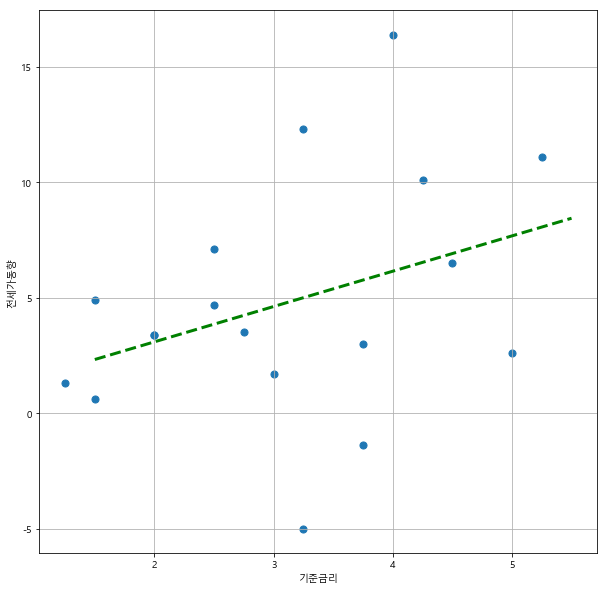

In [163]:
plt.figure(figsize=(10,10))
plt.scatter(data_result14['기준금리'],data_result14['전국'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('기준금리')
plt.ylabel('전세가동향')
plt.grid()
plt.show()

1인당소득이 전세동향을 따라가고 있는지를 분석

In [206]:
data_result15=pd.merge(laborprofit,home_lend,on='연도')
data_result15

,연도,전국_x,서울_x,대구,경기도,전국_y,수도권,서울_y,강남,강북
0,2000,8602,10119,8253,8865,11.1,13.9,13.8,12.5,15.0
1,2001,8964,10616,8481,9126,16.4,20.0,18.7,21.0,16.1
2,2002,9419,11185,8886,9672,10.1,9.5,10.8,11.8,9.8
3,2003,9848,11787,9261,9952,-1.4,-3.3,-3.9,-3.0,-4.8
4,2004,10493,12493,9711,10554,-5.0,-7.2,-7.2,-7.5,-7.0
5,2005,11198,13453,10482,11181,3.0,3.8,2.3,4.7,-0.1
6,2006,11656,13955,10925,11583,6.5,10.4,9.8,10.1,9.6
7,2007,12407,15130,11562,12084,2.6,3.7,3.7,2.2,5.4
8,2008,12883,15401,12017,12592,1.7,1.7,1.1,-1.2,3.5
9,2009,13173,15405,12315,12697,3.4,4.2,6.0,7.9,4.0


In [207]:
data_result15.set_index('연도',inplace=True)
data_result15.head()

,전국_x,서울_x,대구,경기도,전국_y,수도권,서울_y,강남,강북
연도,,,,,,,,,
2000,8602,10119,8253,8865,11.1,13.9,13.8,12.5,15.0
2001,8964,10616,8481,9126,16.4,20.0,18.7,21.0,16.1
2002,9419,11185,8886,9672,10.1,9.5,10.8,11.8,9.8
2003,9848,11787,9261,9952,-1.4,-3.3,-3.9,-3.0,-4.8
2004,10493,12493,9711,10554,-5.0,-7.2,-7.2,-7.5,-7.0


In [212]:
np.corrcoef(data_result15['전국_x'],data_result15['전국_y'])

array([[ 1.        , -0.22543313],
       [-0.22543313,  1.        ]])

In [213]:
fp15=np.polyfit(data_result15['전국_x'],data_result15['전국_y'],1)
fp15

array([-4.00644937e-04,  1.02140070e+01])

In [214]:
f1=np.poly1d(fp15)
fx=np.linspace(8500,18000,15)

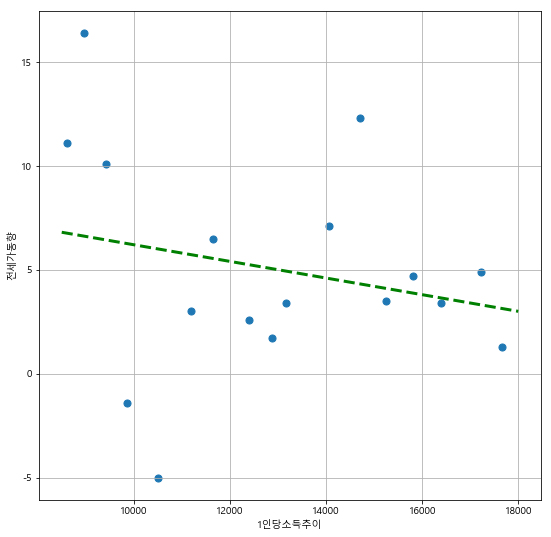

In [215]:
plt.figure(figsize=(9,9))
plt.scatter(data_result15['전국_x'],data_result15['전국_y'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('1인당소득추이')
plt.ylabel('전세가동향')
plt.grid()
plt.show()

In [177]:
fp15=np.polyfit(data_result15['전국_y'],data_result15['전국_x'],1)

f1=np.poly1d(fp15)
fx=np.linspace(-5,17,15)

data_result15['오차']=np.abs(data_result15['전국_y']-f1(data_result15['전국_x']))

dr15=data_result15.sort_values(by='오차',ascending=False)
dr15.head()

,전국_x,서울_x,대구,경기도,전국_y,수도권,서울_y,강남,강북,오차
연도,,,,,,,,,,
2016,17653,20506,16987,17752,1.3,2.0,2.0,1.8,2.1,2.225644e+06
2015,17222,19962,16686,17130,4.9,7.1,7.3,7.9,6.5,2.170977e+06
2014,16394,19104,15851,16131,3.4,4.8,3.6,3.3,3.8,2.065948e+06
2013,15799,18565,15047,15384,4.7,6.2,6.6,6.7,6.5,1.990476e+06
2012,15256,18018,14635,14773,3.5,2.1,2.1,2.4,1.8,1.921597e+06


KeyError: 0

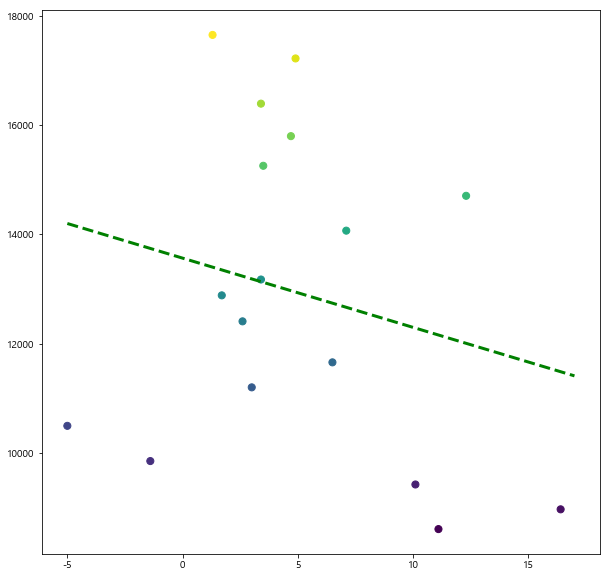

In [179]:
plt.figure(figsize=(10,10))
plt.scatter(data_result15['전국_y'],data_result15['전국_x'],c=data_result15['오차'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
for n in range(10):
    plt.text(dr15['전국_y'][n]*1.02,dr15['전국_x'][n]*0.98,dr15.index[n],fontsize=15)                                                                    
plt.xlabel('전세가동향')
plt.ylabel('1인당소득추이')
                                                                        
plt.colorbar()
plt.grid()
plt.show()